In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [21]:
#read csv file
movie_data = pd.read_csv("/Users/student/Desktop/Portfolio/movies.csv")

In [4]:
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#check for missing data
for col in movie_data.columns:
    pct_missing = np.mean(movie_data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#replacing nan values with 0
movie_data['rating'] = movie_data['rating'].fillna(0)
movie_data['released'] = movie_data['released'].fillna(0)
movie_data['score'] = movie_data['score'].fillna(0)
movie_data['votes'] = movie_data['votes'].fillna(0)
movie_data['budget'] = movie_data['budget'].fillna(0)
movie_data['gross'] = movie_data['gross'].fillna(0)
movie_data['runtime'] = movie_data['runtime'].fillna(0)

In [7]:
movie_data = movie_data.dropna()

In [8]:
#confirm all missing data have been replaced with 0, output 0.0%
for col in movie_data.columns:
    pct_missing = np.mean(movie_data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [9]:
#convert datatypes for budget, gross and runtime to integer
movie_data['budget'] = movie_data['budget'].astype('int64')
movie_data['gross'] = movie_data['gross'].astype('int64')
movie_data['runtime'] = movie_data['runtime'].astype('int64')

In [10]:
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
pd.set_option('display.max_rows', None)

In [12]:
movie_data.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [14]:
movie_data.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


### Hypothesis

In [15]:
#budget and company have a high correlation with gross

<function matplotlib.pyplot.show(close=None, block=None)>

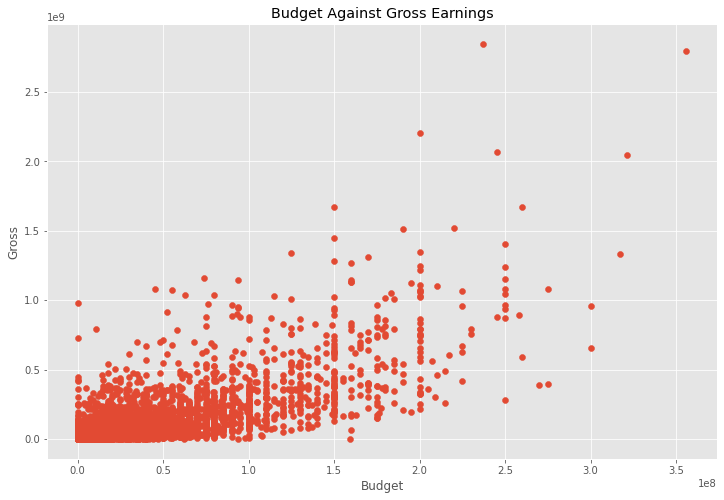

In [16]:
#scatter plot with budget vs gross
plt.scatter(x=movie_data['budget'], y=movie_data['gross'])

plt.title('Budget Against Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show

Text(0.5, 1.0, 'Budget against Gross with regression line')

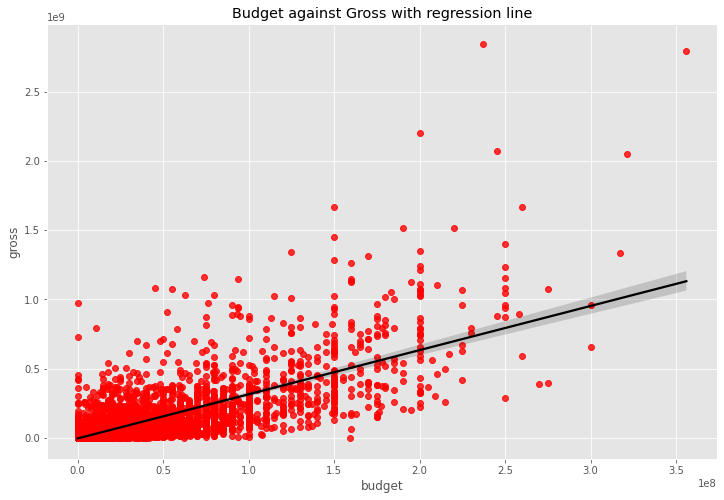

In [17]:
#use seaborn to insert a regression line into our budget vs gross plot
sns.regplot(x='budget', y='gross', data=movie_data, scatter_kws={'color': 'red'}, line_kws={'color': 'black'})
plt.title('Budget against Gross with regression line')

In [18]:
movie_data.corr()# different correlation methhods such as pearson, kendall & spearman by default python uses pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.096109,0.222949,0.310248,0.262346,0.117271
score,0.096109,1.000000,0.408763,0.055277,0.185991,0.397788
votes,0.222949,0.408763,1.000000,0.486523,0.632807,0.308115
budget,0.310248,0.055277,0.486523,1.000000,0.750156,0.268056
gross,0.262346,0.185991,0.632807,0.750156,1.000000,0.244343
runtime,0.117271,0.397788,0.308115,0.268056,0.244343,1.000000


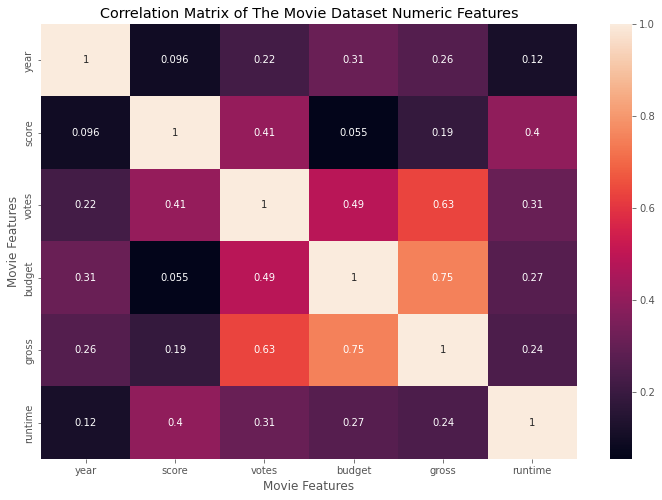

In [19]:
#visualizing the correlation matrix
correlation_matrix = movie_data.corr()
plt.title('Correlation Matrix of The Movie Dataset Numeric Features')
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
#numerize the dataset to apply correlation to all features
numerized_data = movie_data

for col_name in numerized_data.columns:
    if(numerized_data[col_name].dtype == 'object'):
        numerized_data[col_name] = numerized_data[col_name].astype('category')
        numerized_data[col_name] = numerized_data[col_name].cat.codes
        
numerized_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6569,7,6,1980,1702,8.4,927000.0,2579,4002,1041,54,19000000,46998772,2314,146
1,5558,7,1,1980,1489,5.8,65000.0,2262,1629,325,55,4500000,58853106,727,104
2,5129,5,0,1980,1768,8.7,1200000.0,1109,2559,1737,55,18000000,538375067,1535,124
3,285,5,4,1980,1489,7.7,221000.0,1297,1995,2238,55,3500000,83453539,1807,88
4,1026,7,4,1980,1540,7.3,108000.0,1052,518,408,55,6000000,39846344,1772,98


In [22]:
movie_data = movie_data.sort_values(by=['gross'], inplace=False, ascending=False)
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


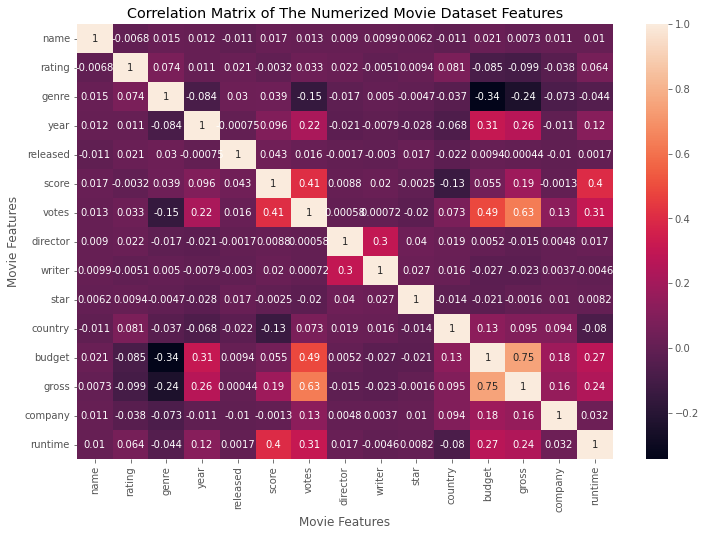

In [23]:
correlation_matrix = numerized_data.corr()
plt.title('Correlation Matrix of The Numerized Movie Dataset Features')
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [24]:
corr_mat = numerized_data.corr()

corr_pairs =corr_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.006767
          genre       0.015234
          year        0.012005
          released   -0.010584
          score       0.016651
          votes       0.013217
          director    0.009005
          writer      0.009906
          star        0.006163
          country    -0.011015
          budget      0.021005
          gross       0.007340
          company     0.010525
          runtime     0.010167
rating    name       -0.006767
          rating      1.000000
          genre       0.074459
          year        0.011413
          released    0.020944
          score      -0.003232
          votes       0.032530
          director    0.021626
          writer     -0.005075
          star        0.009418
          country     0.081447
          budget     -0.084970
          gross      -0.098618
          company    -0.038354
          runtime     0.064494
genre     name        0.015234
          rating      0.074459
        

In [25]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.342807
budget    genre      -0.342807
genre     gross      -0.241572
gross     genre      -0.241572
genre     votes      -0.150238
votes     genre      -0.150238
country   score      -0.133200
score     country    -0.133200
rating    gross      -0.098618
gross     rating     -0.098618
budget    rating     -0.084970
rating    budget     -0.084970
year      genre      -0.084395
genre     year       -0.084395
country   runtime    -0.080290
runtime   country    -0.080290
company   genre      -0.072904
genre     company    -0.072904
country   year       -0.068140
year      country    -0.068140
runtime   genre      -0.044460
genre     runtime    -0.044460
rating    company    -0.038354
company   rating     -0.038354
country   genre      -0.036882
genre     country    -0.036882
year      star       -0.028024
star      year       -0.028024
budget    writer     -0.026584
writer    budget     -0.026584
gross     writer     -0.023141
writer    gross      -0.023141
country 

In [26]:
#finding the features with the highest correlation
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

gross     votes       0.632807
votes     gross       0.632807
budget    gross       0.750156
gross     budget      0.750156
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

## Findings:

In [47]:
#votes and budget are the features with the highest correlation in regards to gorss earnings